In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housesale.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id', 'date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Make sure the value in bedrooms and bathrooms
# Checking if we have a house with bedrooms < 1
df[df['bedrooms'] < 1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [6]:
# Checking if we have a house with bathrooms < 1
df[df['bathrooms'] < 0.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [7]:
# Replacing bedrooms and bathrooms 0 value with their median
# Median bedrooms = 3.00
# Median bathrooms = 2.250
# Reason of using median : The value of the mean will change (decrease), but the median will not until a bigger change occurs.
# Therefore, the median is a more reliable and more stable number than the mean.

df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [8]:
df[df['bedrooms'] < 1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
df[df['bathrooms'] < 0.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


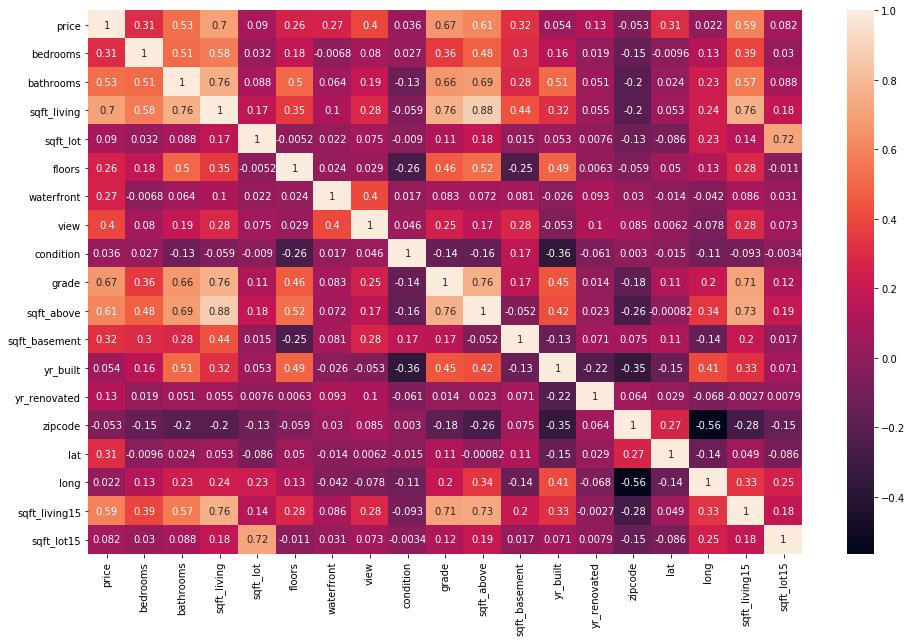

In [10]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525714
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Analysis
- Correlation ranging from -1 to +1
- A high correlation means that two or more variables have a strong relationship with each other
    > Based on the result of correlation, features that considerably have :
    - weak relationship : **zipcode, day, month, long, condition, yr_built, sqft_lot15, sqft_lot, yr_renovated**
    - moderate relationship : **floors, waterfront, lat, bedrooms, sqft_basement, view**
    - strong relationship : **Bathrooms, sqft_living15, sqft_above, grade, sqft_living**

## Feature Engineering & Feature Selection

**8 Features use in this process :**
- bedrooms,
- sqft_basement, 
- view,
- bathrooms, 
- sqft_living15, 
- sqft_above, 
- grade, 
- sqft_living

In [12]:
# Drop columns other than 8 selected features
df.drop(columns=['zipcode', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'yr_renovated', 'floors', 'waterfront', 'lat'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,1340
1,538000.0,3,2.25,2570,0,7,2170,400,1690
2,180000.0,2,1.00,770,0,6,770,0,2720
3,604000.0,4,3.00,1960,0,7,1050,910,1360
4,510000.0,3,2.00,1680,0,8,1680,0,1800


## Binning

In [13]:
# float => int

import math
for i in range(len(df)):
    df.bathrooms[i] = math.ceil(df.bathrooms[i])
df['bathrooms'] = df['bathrooms'].astype(int)

#### sqft_living => 14 groups

In [14]:
sqft_living_ = list(range(1,15))
cut_bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000]
df['sqft_living_'] = pd.cut(df['sqft_living'], bins=cut_bins, labels=sqft_living_)
df['sqft_living_'] = df.sqft_living_.astype(int)

#### sqft_living15 => 14 groups

In [15]:
sqft_living15_ = list(range(1,15))
cut_bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000]
df['sqft_living15_'] = pd.cut(df['sqft_living15'], bins=cut_bins, labels=sqft_living15_)
df['sqft_living15_'] = df.sqft_living15_.astype(int)

#### sqft_basement => 5 groups

In [16]:
sqft_basement_ = list(range(1,6))
cut_bins = [-1,1000,2000,3000,4000,5000]
df['sqft_basement_'] = pd.cut(df['sqft_basement'], bins=cut_bins, labels=sqft_basement_)
df['sqft_basement_'] = df.sqft_basement_.astype(int)

### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [18]:
mm_scale = MinMaxScaler()
r_scale = RobustScaler()
s_scale = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='price')  ### Features / Independent Var
y = df['price']               ### Target / Dependent Var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [20]:
X_train_mm = mm_scale.fit_transform(X_train)
X_test_mm = mm_scale.fit_transform(X_test)

X_train_r = r_scale.fit_transform(X_train)
X_test_r = r_scale.fit_transform(X_test)

X_train_s = s_scale.fit_transform(X_train)
X_test_s = s_scale.fit_transform(X_test)

**Data Proportion**
- Train size : 80%
- Test size : 20%

### Multiple Linear Regression

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Without Scaling

In [22]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [23]:
print(model_LR.coef_)
print(y_pred_LR.shape)

[-2.89532207e+04 -3.06023330e+04  1.37808547e+02  8.71104379e+04
  9.93343286e+04  4.46022890e+01  9.32062584e+01  1.23428430e+01
  8.53937349e+03 -1.02951896e+04 -6.32706965e+03]
(4323,)


In [24]:
R2_score_MLR = r2_score(y_test, y_pred_LR)
MAE_MLR = mean_absolute_error(y_test, y_pred_LR)
MSE_MLR = mean_squared_error(y_test, y_pred_LR)
RMSE_MLR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

print(f"R2_score_MLR {R2_score_MLR}")
print(f"MAE_MLR = {MAE_MLR}")
print(f"MSE_MLR = {MSE_MLR}")
print(f"RMSE_MLR = {RMSE_MLR}")

R2_score_MLR 0.5865391719054411
MAE_MLR = 157911.8601334523
MSE_MLR = 62505648638.33277
RMSE_MLR = 250011.29702142015


### Summary Linear Regression 

### Analysis
Continue using `Linear Regression`

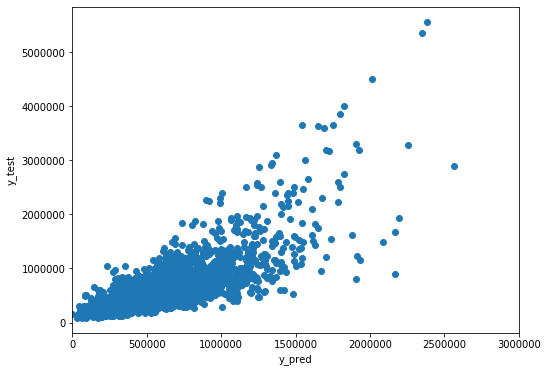

In [25]:
# Scatter plot of actual price and predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_pred_LR, y_test)
plt.xlim([0,3000000])
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

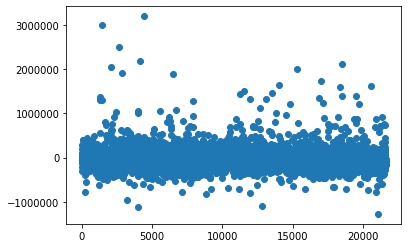

In [26]:
#Plot the error
g=plt.plot((y_test - y_pred_LR), marker='o', linestyle='')

## Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree=2)

X_train_polynom = polynom.fit_transform(X_train)
X_test_polynom = polynom.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
model_polynom = LinearRegression()

In [29]:
model_polynom.fit(X_train_polynom, y_train)
y_pred_polynom = model_polynom.predict(X_test_polynom)
print(y_pred_polynom.shape)

(4323,)


In [30]:
R2_score_polynom = r2_score(y_test, y_pred_polynom)
MAE_polynom = mean_absolute_error(y_test, y_pred_polynom)
MSE_polynom = mean_squared_error(y_test, y_pred_polynom)
RMSE_polynom = np.sqrt(mean_squared_error(y_test, y_pred_polynom))

print(f"R2_score Polynom = {R2_score_polynom}")
print(f"MAE Polynom = {MAE_polynom}")
print(f"MSE Polynom = {MSE_polynom}")
print(f"RMSE Polynom = {RMSE_polynom}")

R2_score Polynom = 0.5862628976289677
MAE Polynom = 150436.337438039
MSE Polynom = 62547414875.131165
RMSE Polynom = 250094.8117717182


### Summary Polynomial Regression 

In [31]:
result = {
    "Multiple Linear Regression" : [R2_score_MLR, MAE_MLR, MSE_MLR, RMSE_MLR],
    "Polynomial" : [R2_score_polynom, MAE_polynom, MSE_polynom, RMSE_polynom]
}

pd.DataFrame(data= result, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Multiple Linear Regression,0.586539,157911.860133,6.250565e+10,250011.297021
Polynomial,0.586263,150436.337438,6.254741e+10,250094.811772


### Analysis
R2 score for Multiple Linear Regression is higher than Polynomial Regression. We can consider to use Multiple Linear Regression

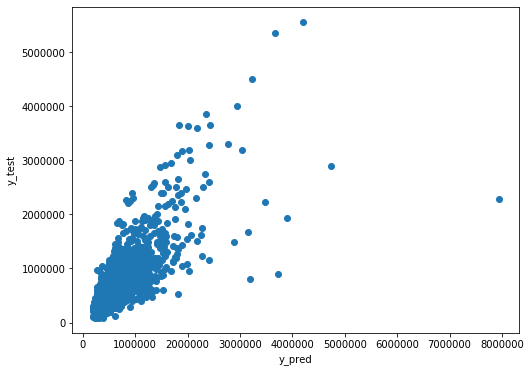

In [32]:
# Scatter plot of actual price and predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_pred_polynom, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

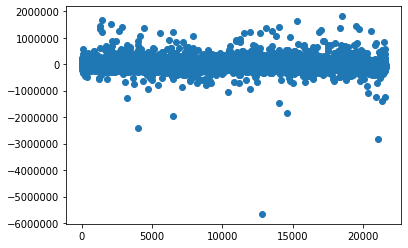

In [33]:
#Plot the error
g=plt.plot((y_test - y_pred_polynom),marker='o',linestyle='')

## Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor
model_DecTree = DecisionTreeRegressor()

#### Without Scaling

In [35]:
model_DecTree.fit(X_train, y_train)
y_pred_DecTree = model_DecTree.predict(X_test)

In [36]:
R2_score_DecTree = r2_score(y_test, y_pred_DecTree)
MAE_DecTree = mean_absolute_error(y_test, y_pred_DecTree)
MSE_DecTree = mean_squared_error(y_test, y_pred_DecTree)
RMSE_DecTree = np.sqrt(mean_squared_error(y_test, y_pred_DecTree))

print(f"R2_score DecTree = {R2_score_DecTree}")
print(f"MAE DecTree = {MAE_DecTree}")
print(f"MSE DecTree = {MSE_DecTree}")
print(f"RMSE DecTree = {RMSE_DecTree}")

R2_score DecTree = 0.31572195689424376
MAE DecTree = 196382.93434343438
MSE DecTree = 103446904826.28381
RMSE DecTree = 321631.6290825326


#### MinMax Scaling

In [37]:
model_DecTree.fit(X_train_mm, y_train)
y_pred_DecTree_mm = model_DecTree.predict(X_test_mm)

In [38]:
R2_score_DecTree_mm = r2_score(y_test, y_pred_DecTree_mm)
MAE_DecTree_mm = mean_absolute_error(y_test, y_pred_DecTree_mm)
MSE_DecTree_mm = mean_squared_error(y_test, y_pred_DecTree_mm)
RMSE_DecTree_mm = np.sqrt(mean_squared_error(y_test, y_pred_DecTree_mm))

print(f"R2_score DecTree MinMax = {R2_score_DecTree_mm}")
print(f"MAE DecTree MinMax = {MAE_DecTree_mm}")
print(f"MSE DecTree MinMax = {MSE_DecTree_mm}")
print(f"RMSE DecTree MinMax = {RMSE_DecTree_mm}")

R2_score DecTree MinMax = -0.3940278317500405
MAE DecTree MinMax = 282399.6884108258
MSE DecTree MinMax = 210744544398.52557
RMSE DecTree MinMax = 459069.21525901253


#### Robust Scaling

In [39]:
model_DecTree.fit(X_train_r, y_train)
y_pred_DecTree_r = model_DecTree.predict(X_test_r)

In [40]:
R2_score_DecTree_r = r2_score(y_test, y_pred_DecTree_r)
MAE_DecTree_r = mean_absolute_error(y_test, y_pred_DecTree_r)
MSE_DecTree_r = mean_squared_error(y_test, y_pred_DecTree_r)
RMSE_DecTree_r = np.sqrt(mean_squared_error(y_test, y_pred_DecTree_r))

print(f"R2_score DecTree Robust = {R2_score_DecTree_r}")
print(f"MAE DecTree Robust = {MAE_DecTree_r}")
print(f"MSE DecTree Robust = {MSE_DecTree_r}")
print(f"RMSE DecTree Robust = {RMSE_DecTree_r}")

R2_score DecTree Robust = 0.29225625949198464
MAE DecTree Robust = 203225.09761739534
MSE DecTree Robust = 106994371810.37161
RMSE DecTree Robust = 327099.9416239196


#### Standard Scaling

In [41]:
model_DecTree.fit(X_train_s, y_train)
y_pred_DecTree_s = model_DecTree.predict(X_test_s)

In [42]:
R2_score_DecTree_s = r2_score(y_test, y_pred_DecTree_s)
MAE_DecTree_s = mean_absolute_error(y_test, y_pred_DecTree_s)
MSE_DecTree_s = mean_squared_error(y_test, y_pred_DecTree_s)
RMSE_DecTree_s = np.sqrt(mean_squared_error(y_test, y_pred_DecTree_s))

print(f"R2_score DecTree Standard = {R2_score_DecTree_s}")
print(f"MAE DecTree Standard = {MAE_DecTree_s}")
print(f"MSE DecTree Standard = {MSE_DecTree_s}")
print(f"RMSE DecTree Standard = {RMSE_DecTree_s}")

R2_score DecTree Standard = 0.3292372225796337
MAE DecTree Standard = 196371.7941533657
MSE DecTree Standard = 101403711394.68864
RMSE DecTree Standard = 318439.49408747756


In [43]:
result_DecTree = {
    "Without Scaling Decision Tree" : [R2_score_DecTree, MAE_DecTree, MSE_DecTree, RMSE_DecTree],
    "MinMax" : [R2_score_DecTree_mm, MAE_DecTree_mm, MSE_DecTree_mm, RMSE_DecTree_mm],
    "Robust" : [R2_score_DecTree_r, MAE_DecTree_r, MSE_DecTree_r, RMSE_DecTree_r],
    "Standard" : [R2_score_DecTree_s, MAE_DecTree_s, MSE_DecTree_s, RMSE_DecTree_s]
}

pd.DataFrame(data= result_DecTree, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Without Scaling Decision Tree,0.315722,196382.934343,1.034469e+11,321631.629083
MinMax,-0.394028,282399.688411,2.107445e+11,459069.215259
Robust,0.292256,203225.097617,1.069944e+11,327099.941624
Standard,0.329237,196371.794153,1.014037e+11,318439.494087


### Analysis
Continue using `Without scaling` Decision Tree

## Summary Decision Tree 

In [44]:
result_MLR_Pol_DecTree = {
    "Multiple Linear Regression" : [R2_score_MLR, MAE_MLR, MSE_MLR, RMSE_MLR],
    "Polynomial" : [R2_score_polynom, MAE_polynom, MSE_polynom, RMSE_polynom],
    "Decision Tree" : [R2_score_DecTree, MAE_DecTree, MSE_DecTree, RMSE_DecTree]
}

pd.DataFrame(data= result_MLR_Pol_DecTree, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Multiple Linear Regression,0.586539,157911.860133,6.250565e+10,250011.297021
Polynomial,0.586263,150436.337438,6.254741e+10,250094.811772
Decision Tree,0.315722,196382.934343,1.034469e+11,321631.629083


### Analysis
Multiple Linear Regression still has the best R2 score.

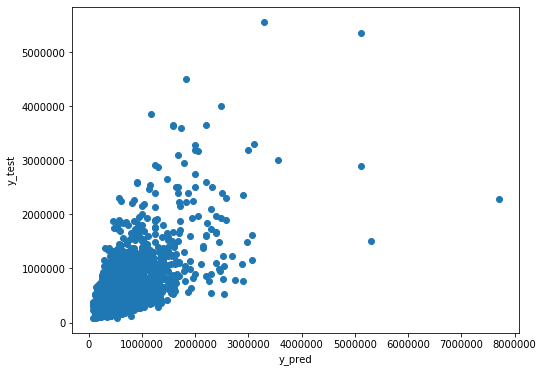

In [45]:
# Scatter plot of actual price and predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_pred_DecTree, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

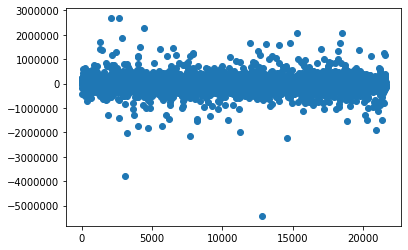

In [46]:
#Plot the error
g=plt.plot((y_test - y_pred_DecTree),marker='o',linestyle='')

## Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=1000, max_depth=7)


#### Without Scaling

In [48]:
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [49]:
R2_score_RF = r2_score(y_test, y_pred_RF)
MAE_RF = mean_absolute_error(y_test, y_pred_RF)
MSE_RF = mean_squared_error(y_test, y_pred_RF)
RMSE_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))

print(f"R2_score Random Forest = {R2_score_RF}")
print(f"MAE Random Forest = {MAE_RF}")
print(f"MSE Random Forest = {MSE_RF}")
print(f"RMSE Random Forest = {RMSE_RF}")

R2_score Random Forest = 0.6095196850678728
MAE Random Forest = 148890.95714019306
MSE Random Forest = 59031530212.460945
RMSE Random Forest = 242964.0512760292


In [50]:
result_RF = {
    "Random Forest" : [R2_score_RF, MAE_RF, MSE_RF, RMSE_RF]
}

pd.DataFrame(data= result_RF, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Random Forest,0.60952,148890.95714,5.903153e+10,242964.051276


### Analysis
For Random Forest has 0.61 R2 score

## Summary Random Forest 

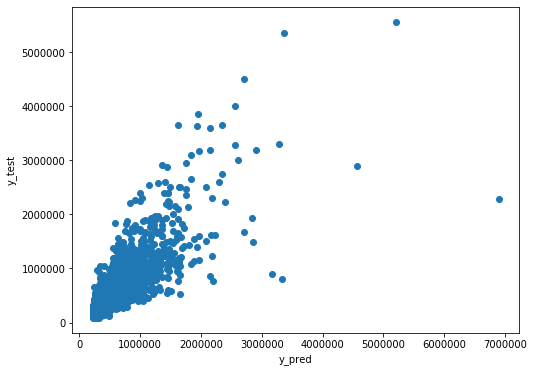

In [51]:
# Scatter plot of actual price and predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_pred_RF, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

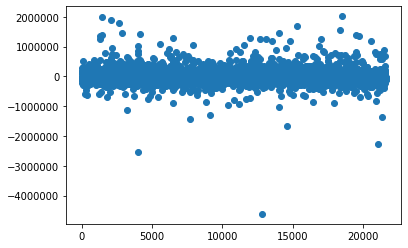

In [52]:
#Plot the error
g=plt.plot((y_test - y_pred_RF),marker='o',linestyle='')

In [53]:
result_MLR_Pol_DecTree_RF = {
    "Multiple Linear Regression (without scaling)" : [R2_score_MLR, MAE_MLR, MSE_MLR, RMSE_MLR],
    "Polynomial" : [R2_score_polynom, MAE_polynom, MSE_polynom, RMSE_polynom],
    "Decision Tree (without scaling)" : [R2_score_DecTree, MAE_DecTree, MSE_DecTree, RMSE_DecTree],
    "Random Forest" : [R2_score_RF, MAE_RF, MSE_RF, RMSE_RF]
}

pd.DataFrame(data= result_MLR_Pol_DecTree_RF, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Multiple Linear Regression (without scaling),0.586539,157911.860133,6.250565e+10,250011.297021
Polynomial,0.586263,150436.337438,6.254741e+10,250094.811772
Decision Tree (without scaling),0.315722,196382.934343,1.034469e+11,321631.629083
Random Forest,0.609520,148890.957140,5.903153e+10,242964.051276


## Analysis

Use Random Forest Modelling

## KNN

In [54]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()

#### Without Scaling

In [55]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [56]:
R2_score_knn = r2_score(y_test, y_pred_knn)
MAE_knn = mean_absolute_error(y_test, y_pred_knn)
MSE_knn = mean_squared_error(y_test, y_pred_knn)
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"R2_score KNN = {R2_score_knn}")
print(f"MAE KNN = {MAE_knn}")
print(f"MSE KNN = {MSE_knn}")
print(f"RMSE KNN = {RMSE_knn}")

R2_score KNN = 0.5009030738228526
MAE KNN = 174280.90765671985
MSE KNN = 75451832396.9642
RMSE KNN = 274684.96936848253


#### MinMax

In [57]:
model_knn.fit(X_train_mm, y_train)
y_pred_knn_mm = model_knn.predict(X_test_mm)

In [58]:
R2_score_knn_mm = r2_score(y_test, y_pred_knn_mm)
MAE_knn_mm = mean_absolute_error(y_test, y_pred_knn_mm)
MSE_knn_mm = mean_squared_error(y_test, y_pred_knn_mm)
RMSE_knn_mm = np.sqrt(mean_squared_error(y_test, y_pred_knn_mm))

print(f"R2_score MinMax KNN = {R2_score_knn_mm}")
print(f"MAE MinMax KNN = {MAE_knn_mm}")
print(f"MSE MinMax KNN = {MSE_knn_mm}")
print(f"RMSE MinMax KNN = {RMSE_knn_mm}")

R2_score MinMax KNN = 0.4898215665684468
MAE MinMax KNN = 174575.91996298867
MSE MinMax KNN = 77127098230.53578
RMSE MinMax KNN = 277717.6591982148


#### Robust Scaling

In [59]:
model_knn.fit(X_train_r, y_train)
y_pred_knn_r = model_knn.predict(X_test_r)

In [60]:
R2_score_knn_r = r2_score(y_test, y_pred_knn_r)
MAE_knn_r = mean_absolute_error(y_test, y_pred_knn_r)
MSE_knn_r = mean_squared_error(y_test, y_pred_knn_r)
RMSE_knn_r = np.sqrt(mean_squared_error(y_test, y_pred_knn_r))

print(f"R2_score Robust KNN = {R2_score_knn_r}")
print(f"MAE Robust KNN = {MAE_knn_r}")
print(f"MSE Robust KNN = {MSE_knn_r}")
print(f"RMSE Robust KNN = {RMSE_knn_r}")

R2_score Robust KNN = 0.5885144231965609
MAE Robust KNN = 154185.28674531574
MSE Robust KNN = 62207036642.260185
RMSE Robust KNN = 249413.385050322


#### Standard Scaling

In [61]:
model_knn.fit(X_train_s, y_train)
y_pred_knn_s = model_knn.predict(X_test_s)

In [62]:
R2_score_knn_s = r2_score(y_test, y_pred_knn_s)
MAE_knn_s = mean_absolute_error(y_test, y_pred_knn_s)
MSE_knn_s = mean_squared_error(y_test, y_pred_knn_s)
RMSE_knn_s = np.sqrt(mean_squared_error(y_test, y_pred_knn_s))

print(f"R2_score Standard Scaling KNN = {R2_score_knn_s}")
print(f"MAE Standard Scaling KNN = {MAE_knn_s}")
print(f"MSE Standard Scaling KNN = {MSE_knn_s}")
print(f"RMSE Standard Scaling KNN = {RMSE_knn_s}")

R2_score Standard Scaling KNN = 0.5796580653143384
MAE Standard Scaling KNN = 155172.75808466345
MSE Standard Scaling KNN = 63545911709.46467
RMSE Standard Scaling KNN = 252083.1444374349


In [63]:
result_knn = {
    "Without Scaling KNN" : [R2_score_knn, MAE_knn, MSE_knn, RMSE_knn],
    "MinMax" : [R2_score_knn_mm, MAE_knn_mm, MSE_knn_mm, RMSE_knn_mm],
    "Robust" : [R2_score_knn_r, MAE_knn_r, MSE_knn_r, RMSE_knn_r],
    "Standard" : [R2_score_knn_s, MAE_knn_s, MSE_knn_s, RMSE_knn_s]
}

pd.DataFrame(data= result_knn, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Without Scaling KNN,0.500903,174280.907657,7.545183e+10,274684.969368
MinMax,0.489822,174575.919963,7.712710e+10,277717.659198
Robust,0.588514,154185.286745,6.220704e+10,249413.385050
Standard,0.579658,155172.758085,6.354591e+10,252083.144437


### Analysis
For KNN, using `Robust Scaling`. It has the best R2 score among all.

## Summary KNN 

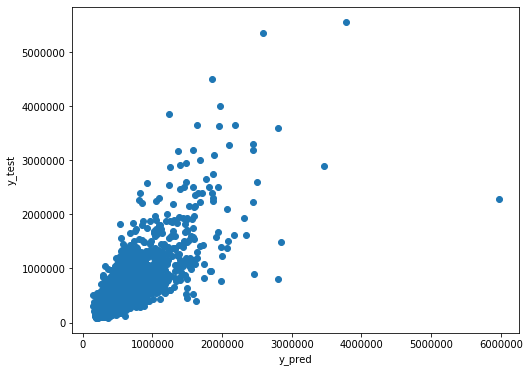

In [64]:
# Scatter plot of actual price and predicted price
plt.figure(figsize=(8,6))
plt.scatter(y_pred_knn_s, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

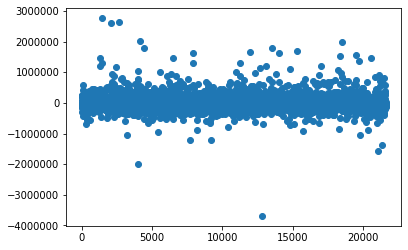

In [65]:
#Plot the error
g=plt.plot((y_test - y_pred_knn_s), marker='o', linestyle='')

In [66]:
result_MLR_Pol_DecTree_RF_KNN = {
    "Multiple Linear Regression (without scaling)" : [R2_score_MLR, MAE_MLR, MSE_MLR, RMSE_MLR],
    "Polynomial" : [R2_score_polynom, MAE_polynom, MSE_polynom, RMSE_polynom],
    "Decision Tree (without scaling)" : [R2_score_DecTree, MAE_DecTree, MSE_DecTree, RMSE_DecTree],
    "Random Forest" : [R2_score_RF, MAE_RF, MSE_RF, RMSE_RF],
    "KNN (Robust)" : [R2_score_knn_r, MAE_knn_r, MSE_knn_r, RMSE_knn_r]
}

pd.DataFrame(data= result_MLR_Pol_DecTree_RF_KNN, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Multiple Linear Regression (without scaling),0.586539,157911.860133,6.250565e+10,250011.297021
Polynomial,0.586263,150436.337438,6.254741e+10,250094.811772
Decision Tree (without scaling),0.315722,196382.934343,1.034469e+11,321631.629083
Random Forest,0.609520,148890.957140,5.903153e+10,242964.051276
KNN (Robust),0.588514,154185.286745,6.220704e+10,249413.385050


### Analysis
Random Forest has the best R2 score than `Multiple Linear Regression (without scaling)`, `Polynomial`, `Decision Tree (without scaling)`, `KNN (Robust)`.

## Hyperparameter Tuning

### Linear Regression

In [67]:
from sklearn.model_selection import GridSearchCV
model_LR_tuned = LinearRegression()
Hyperparam_LR = {'fit_intercept':[True, False],
               'normalize':[False, True],
               'copy_X':[True, False]
               }

In [68]:
model_LR_tuned = GridSearchCV(estimator = model_LR_tuned, param_grid= Hyperparam_LR, n_jobs = -1, cv = 5, verbose = 1)
model_LR_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [69]:
model_LR_tuned.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [70]:
model_LR_tuned_ = model_LR_tuned.best_estimator_
y_LR_tuned =  model_LR_tuned_.predict(X_test)

In [71]:
R2_score_LR_tuned = r2_score(y_test, y_LR_tuned)
MAE_LR_tuned = mean_absolute_error(y_test, y_LR_tuned)
MSE_LR_tuned = mean_squared_error(y_test, y_LR_tuned)
RMSE_LR_tuned = np.sqrt(mean_squared_error(y_test, y_LR_tuned))

print(f"R2 Score LR Tuned = {R2_score_LR_tuned}")
print(f"MAE LR Tuned = {MAE_LR_tuned}")
print(f"MSE LR Tuned = {MSE_LR_tuned}")
print(f"RMSE LR Tuned = {RMSE_LR_tuned}")

R2 Score LR Tuned = 0.5865391719054411
MAE LR Tuned = 157911.8601334523
MSE LR Tuned = 62505648638.33277
RMSE LR Tuned = 250011.29702142015


### KNN Regressor

In [72]:
KNN_tuned = KNeighborsRegressor()
param_KNN = {"n_neighbors" : [5, 15, 25],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_KNN = GridSearchCV(estimator=KNN_tuned, param_grid=param_KNN, n_jobs = -1, cv = 3, verbose=1 )

model_KNN.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [73]:
model_KNN.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}

In [74]:
model_KNN.best_score_

0.5464086843936254

In [75]:
model_KNN.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=1,
                    weights='uniform')

In [76]:
KNN_Tuned = model_KNN.best_estimator_
y_tunedKNN = KNN_Tuned.predict(X_test)

In [77]:
r2_tuned_KNN = r2_score(y_test, y_tunedKNN)
MAE_tuned_KNN = mean_absolute_error(y_test, y_tunedKNN)
MSE_tuned_KNN = mean_squared_error(y_test, y_tunedKNN)
RMSE_tuned_KNN = np.sqrt(MSE_tuned_KNN)


print(f"R2 Score KNN Tuned = {r2_tuned_KNN}")
print(f"MAE KNN Tuned = {MAE_tuned_KNN}")
print(f"MSE KNN Tuned = {MSE_tuned_KNN}")
print(f"RMSE KNN Tuned = {RMSE_tuned_KNN}")

R2 Score KNN Tuned = 0.5637731450006611
MAE KNN Tuned = 163478.87678926668
MSE KNN Tuned = 65947341736.94856
RMSE KNN Tuned = 256802.14511749812


### Decision Tree Regressor

In [78]:
DT_tuned = DecisionTreeRegressor()
param_DT ={"max_depth" : [None, 5, 7, 9, 20],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

model_DT = GridSearchCV(estimator=DT_tuned, param_grid=param_DT, cv = 3, n_jobs=-1, verbose=1)
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 398 out of 405 | elapsed:   12.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   12.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9, 20],
                         'max_features': [None, 0.8, 0.7],
                         'min_samples_l

In [79]:
model_DT.best_params_

{'max_depth': 7,
 'max_features': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [80]:
DT_tuned = model_DT.best_estimator_
y_tunedDT = DT_tuned.predict(X_test)

In [81]:
r2_tuned_DT = r2_score(y_test, y_tunedDT)
MAE_tuned_DT = mean_absolute_error(y_test, y_tunedDT)
MSE_tuned_DT = mean_squared_error(y_test, y_tunedDT)
RMSE_tuned_DT = np.sqrt(MSE_tuned_DT)


print(f"R2 Score Decision Tree Tuned = {r2_tuned_DT}")
print(f"MAE Decision Tree Tuned = {MAE_tuned_DT}")
print(f"MSE Decision Tree Tuned = {MSE_tuned_DT}")
print(f"RMSE Decision Tree Tuned = {RMSE_tuned_DT}")

R2 Score Decision Tree Tuned = 0.5742949859476381
MAE Decision Tree Tuned = 154510.91116806705
MSE Decision Tree Tuned = 64356684415.695
RMSE Decision Tree Tuned = 253686.1927967208


### Random Forest Regressor

In [82]:
RF = RandomForestRegressor()
param_RF = {"n_estimators" : [100, 200, 500, 700],
          "max_depth" : [None, 5, 7, 9, 20],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 3, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 69.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 100.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 142.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [84]:
model_RF.best_params_

{'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [85]:
RF_tuned = model_RF.best_estimator_
y_tuned_RF = RF_tuned.predict(X_test)

In [86]:
r2_tuned_RF = r2_score(y_test, y_tuned_RF)
MAE_tuned_RF = mean_absolute_error(y_test, y_tuned_RF)
MSE_tuned_RF = mean_squared_error(y_test, y_tuned_RF)
RMSE_tuned_RF = np.sqrt(MSE_tuned_RF)


print(f"R2 Score Random Forest Tuned = {r2_tuned_RF}")
print(f"MAE Random Forest Tuned = {MAE_tuned_RF}")
print(f"MSE Random Forest Tuned = {MSE_tuned_RF}")
print(f"RMSE Random Forest Tuned = {RMSE_tuned_RF}")

R2 Score Random Forest Tuned = 0.6134868781229768
MAE Random Forest Tuned = 147249.6424060784
MSE Random Forest Tuned = 58431783009.50209
RMSE Random Forest Tuned = 241726.67004181002


# Result Hyperparameter Tuning

In [87]:
result_tuned = {
    "Linear Regression Tuned" : [R2_score_LR_tuned, MAE_LR_tuned, MSE_LR_tuned, RMSE_LR_tuned],
    "KNN Tuned" : [r2_tuned_KNN, MAE_tuned_KNN, MSE_tuned_KNN, RMSE_tuned_KNN],
    "Decision Tree Tuned" : [r2_tuned_DT, MAE_tuned_DT, MSE_tuned_DT, RMSE_tuned_DT],
    "Random Forest Tuned" : [r2_tuned_RF, MAE_tuned_RF, MSE_tuned_RF, RMSE_tuned_RF]
}

pd.DataFrame(data= result_tuned, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Linear Regression Tuned,0.586539,157911.860133,6.250565e+10,250011.297021
KNN Tuned,0.563773,163478.876789,6.594734e+10,256802.145117
Decision Tree Tuned,0.574295,154510.911168,6.435668e+10,253686.192797
Random Forest Tuned,0.613487,147249.642406,5.843178e+10,241726.670042


# Result Base Model

In [88]:
result_MLR_Pol_DecTree_RF_KNN = {
    "Multiple Linear Regression (without scaling)" : [R2_score_MLR, MAE_MLR, MSE_MLR, RMSE_MLR],
    "Polynomial" : [R2_score_polynom, MAE_polynom, MSE_polynom, RMSE_polynom],
    "Decision Tree (without scaling)" : [R2_score_DecTree, MAE_DecTree, MSE_DecTree, RMSE_DecTree],
    "Random Forest" : [R2_score_RF, MAE_RF, MSE_RF, RMSE_RF],
    "KNN (Robust)" : [R2_score_knn_r, MAE_knn_r, MSE_knn_r, RMSE_knn_r]
}

pd.DataFrame(data= result_MLR_Pol_DecTree_RF_KNN, index=['R2_Score', 'MAE', 'MSE', 'RMSE']).T

,R2_Score,MAE,MSE,RMSE
Multiple Linear Regression (without scaling),0.586539,157911.860133,6.250565e+10,250011.297021
Polynomial,0.586263,150436.337438,6.254741e+10,250094.811772
Decision Tree (without scaling),0.315722,196382.934343,1.034469e+11,321631.629083
Random Forest,0.609520,148890.957140,5.903153e+10,242964.051276
KNN (Robust),0.588514,154185.286745,6.220704e+10,249413.385050


## Conclusion and Recommendation

1. Random Forest Tuned has the best R2 score than `Linear Regression Tuned`, `KNN Tuned`, `Decision Tree Tuned`.

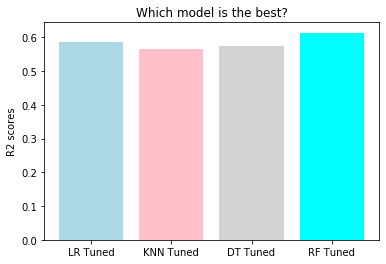

In [89]:
models = ['LR Tuned', 'KNN Tuned', 'DT Tuned', 'RF Tuned']
r2_score_all = [R2_score_LR_tuned,r2_tuned_KNN,  r2_tuned_DT, r2_tuned_RF]

plt.bar(models, r2_score_all, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("R2 scores")
plt.title("Which model is the best?")
plt.show()